# Edunet foundation
    Table of Content:

        •Problem Statement 
        •Import Libraries
        •Loading the dataset
        •Data Preprocessing
                1. Data Cleaning
                2. Handling Missing data
                3. Outlier detection check
                    --Turkey Interquartile range(IQR)
                    -- Kernel Density Estimation
                4. Distribution of Features
                    --Piechart
                    --Histogram
                    --Boxplot

        •Feature Selection and Model Building
            1. Data Partitioning into training and testing
            2. Fitting Linear
                •Linear Regression
                •Ridge Regression Cross Validation
                •Lasso Regression
                •Lasso Regression Cross Validation

# Problem Statement

"Predict the charges to the Insurance policyholders. You can analyze all relevant data for the health insurance of a group of insurance policies and develop focused amount charge program."

# Import needed Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 

from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
#checking the working directory
import os
#os.getcwd()
#changing current working directory
os.chdir('..\Health-Insurance-Cost-Prediction---Linear-Regression')

# Load the Dataset

In [3]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data preprocessing

In [4]:
#allowing cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
#display maximum columns to fit my display
pd.set_option('display.max_columns', 100)

In [6]:
#view statistical characteristics of the first 10 observations based on 'charges' variable
data.groupby('charges').describe().head(10)

age                                           bmi             \
          count  mean std   min   25%   50%   75%   max count   mean std   
charges                                                                    
1121.8739   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  23.21 NaN   
1131.5066   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  30.14 NaN   
1135.9407   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  33.33 NaN   
1136.3994   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  33.66 NaN   
1137.0110   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  34.10 NaN   
1137.4697   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  34.43 NaN   
1141.4451   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  37.29 NaN   
1146.7966   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  41.14 NaN   
1149.3959   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  43.01 NaN   
1163.4627   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  53.13 NaN   

                                             children                          \
             min    25%    50%    75%    max    count mean std  min  25%  50%   
charges                                                                         
1121.8739  23.21  23.21  23.21  23.21  23.21      1.0  0.0 NaN  0.0  0.0  0.0   
1131.5066  30.14  30.14  30.14  30.14  30.14      1.0  0.0 NaN  0.0  0.0  0.0   
1135.9407  33.33  33.33  33.33  33.33  33.33      1.0  0.0 NaN  0.0  0.0  0.0   
1136.3994  33.66  33.66  33.66  33.66  33.66      1.0  0.0 NaN  0.0  0.0  0.0   
1137.0110  34.10  34.10  34.10  34.10  34.10      1.0  0.0 NaN  0.0  0.0  0.0   
1137.4697  34.43  34.43  34.43  34.43  34.43      1.0  0.0 NaN  0.0  0.0  0.0   
1141.4451  37.29  37.29  37.29  37.29  37.29      1.0  0.0 NaN  0.0  0.0  0.0   
1146.7966  41.14  41.14  41.14  41.14  41.14      1.0  0.0 NaN  0.0  0.0  0.0   
1149.3959  43.01  43.01  43.01  43.01  43.01      1.0  0.0 NaN  0.0  0.0  0.0   
1163.4627  53.13  53.13  53.13  53.13  53.13      1.0  0.0 NaN  0.0  0.0  0.0   

                     
           75%  max  
charges              
1121.8739  0.0  0.0  
1131.5066  0.0  0.0  
1135.9407  0.0  0.0  
1136.3994  0.0  0.0  
1137.0110  0.0  0.0  
1137.4697  0.0  0.0  
1141.4451  0.0  0.0  
1146.7966  0.0  0.0  
1149.3959  0.0  0.0  
1163.4627  0.0  0.0

Data cleaning

In [16]:
#changing sex attribute into binary
lb = LabelEncoder()
data['sex'] = lb.fit_transform(data.sex)

#changing region attribute into binary
lb = LabelEncoder()
data['smoker'] = lb.fit_transform(data.smoker)

#changing region attribute into binary
lb = LabelEncoder()
data['region'] = lb.fit_transform(data.region)

Handling Missing data

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

        --No missing values observed

OUTLIER:
--An outlier is an observaton that deviates drastically from other observations in a dataset.
Outlier occurence:
    1. Natural
    2. Error
Outlier Detection:
--We can use any of the two outlier detection approaches
     1. Turkey Interquartile range(IQR)
     2. Kernel Density Estimation

1. Turkey Interquartile range(IQR)

In [9]:
import warnings
warnings.filterwarnings('ignore')

def find_outlier_turkey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - .3*iqr #0.3 is an arbitrary number i've used
    ceiling = q3 + 3.5*iqr
    outlier_indices = list(x.index[(x<floor)| (x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [10]:
#Finding outliers in the attribute 'charges'
tukey_indices, turkey_values = find_outlier_turkey(data['charges'])
print("Outliers found in Charges: %s" %np.sort(turkey_values))
len(turkey_values)

Outliers found in Charges: [ 1121.8739   1131.5066   1135.9407   1136.3994   1137.011    1137.4697
  1141.4451   1146.7966   1149.3959   1163.4627  58571.07448 60021.39897
 62592.87309 63770.42801]


14

In [11]:
#view dataset made of 'Charges' variable Outliers
Amount_of_charges_outlier_table = data.loc[data['charges'].apply(lambda x: x in [1121.8739,1131.5066,1135.9407,1136.3994,1137.011,1137.4697,
1141.4451,1146.7966,1149.3959,1163.4627,58571.07448, 60021.39897,62592.87309,63770.42801])]
Amount_of_charges_outlier_table.sort_values('charges').head(10)

,age,sex,bmi,children,smoker,region,charges
940,18,1,23.21,0,no,2,1121.8739
808,18,1,30.14,0,no,2,1131.5066
1244,18,1,33.33,0,no,2,1135.9407
663,18,1,33.66,0,no,2,1136.3994
22,18,1,34.10,0,no,2,1137.0110
194,18,1,34.43,0,no,2,1137.4697
866,18,1,37.29,0,no,2,1141.4451
781,18,1,41.14,0,no,2,1146.7966
442,18,1,43.01,0,no,2,1149.3959
1317,18,1,53.13,0,no,2,1163.4627


In [12]:
#statistical output for 'charges' attribute
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

2. Kernel Density Estimation(KDE)

    --Non-parametric way to estimate the probability density function(PDF) of a given feature.
    
    --Capture outlier in bimodal distribution.
    
    
[To execute KDE code you need huge computational resources.]

Distribution of Features

1    676
0    662
Name: sex, dtype: int64

<Figure size 600x900 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1f01565f5c0>,
 [Text(-0.019722075269459984, 1.1998379222824498, 'Male'),
  Text(0.018078568997005343, -1.0998514287589123, 'Female')],
 [Text(-0.011504543907184991, 0.6999054546647624, '50.52%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.48%')])

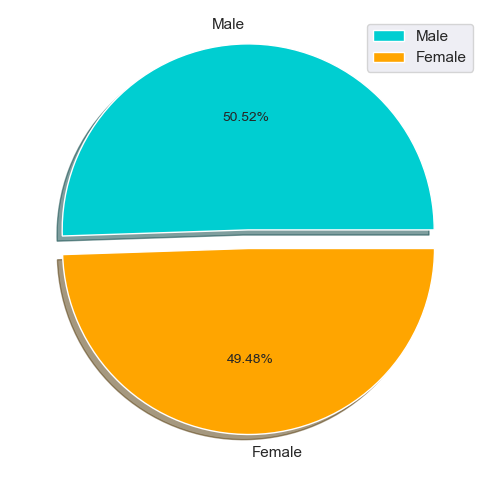

In [13]:
#GenderProportion
count = data.sex.value_counts()
count

#piechart
labels = ['Male', 'Female']
explode = [0.1, 0]
colors = ['darkturquoise', 'Orange']

plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(count, explode=[0.1, 0], labels= labels, colors= colors, autopct='%0.02f%%', shadow=True)
plt.legend()

<Figure size 1500x600 with 0 Axes>

(array([0.05394164, 0.01819718, 0.01819718, 0.02729577, 0.01787223,
        0.01754728, 0.02534607, 0.01624748, 0.01624748, 0.01689738,
        0.02632092, 0.01819718, 0.01884708, 0.02794567, 0.01884708,
        0.01819718, 0.02534607, 0.01624748, 0.01494768, 0.02209658]),
 array([18. , 20.3, 22.6, 24.9, 27.2, 29.5, 31.8, 34.1, 36.4, 38.7, 41. ,
        43.3, 45.6, 47.9, 50.2, 52.5, 54.8, 57.1, 59.4, 61.7, 64. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of age')

(array([0.00522787, 0.00683644, 0.01890076, 0.0321715 , 0.04142081,
        0.05268083, 0.06514729, 0.06313657, 0.05831084, 0.05750656,
        0.04222509, 0.03619294, 0.02171576, 0.01689004, 0.00804287,
        0.00482572, 0.00402144, 0.00160857, 0.00040214, 0.00080429]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of bmi')

(array([6.84770002e-05, 5.94103591e-05, 4.89121430e-05, 4.60489932e-05,
        1.69403032e-05, 1.38385575e-05, 1.09754077e-05, 9.54383278e-06,
        5.96489549e-06, 2.38595820e-06, 5.96489549e-06, 8.11225786e-06,
        7.15787459e-06, 6.44208713e-06, 5.24910803e-06, 2.38595820e-06,
        2.38595820e-07, 2.38595820e-07, 4.77191639e-07, 4.77191639e-07]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of charges')

(array([1.71599402, 0.        , 0.        , 0.        , 0.96860987,
        0.        , 0.        , 0.        , 0.71748879, 0.        ,
        0.        , 0.        , 0.46935725, 0.        , 0.        ,
        0.        , 0.07473842, 0.        , 0.        , 0.05381166]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of children')

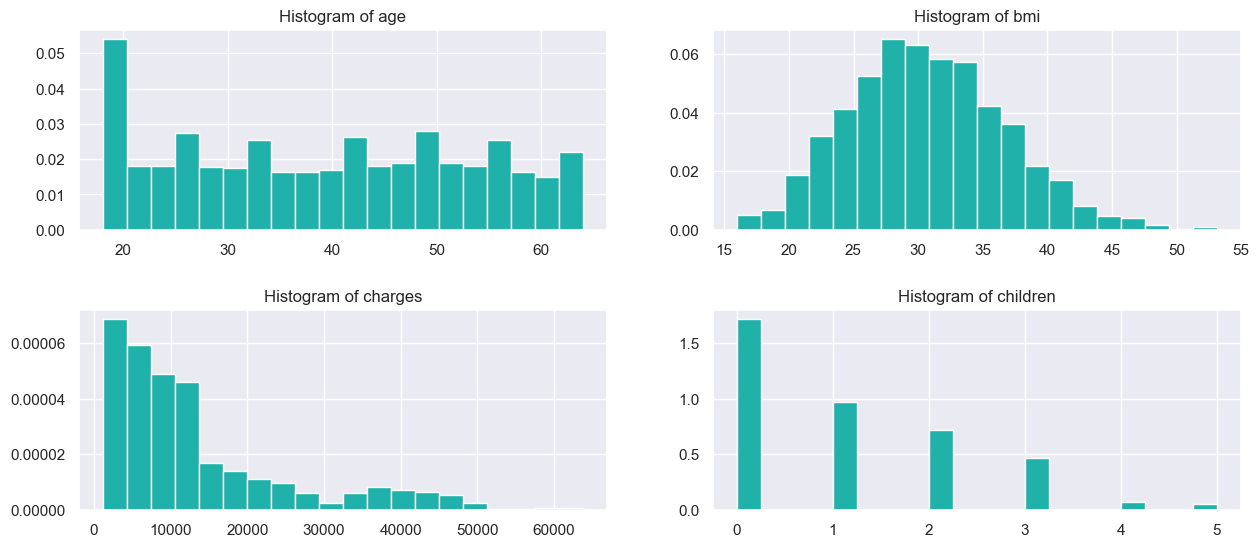

In [14]:
#histogram
plt.figure(figsize=(15,6), dpi =100,facecolor='white')
n =0
for x in ['age', 'bmi', 'charges', 'children']:
    n +=1
    plt.subplot(2,2,n)
    plt.hist(data[x], bins=20,  density= True, color= 'lightseagreen')
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4, left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9)
    plt.title('Histogram of {}'.format(x))
plt.show()

--From the above distribution histogram we can conclude:
        1. 'age' attribute is random
        2. 'bmi' attribute is normally distributed
        3. 'charges' attribute is somewhat positively skewed
        4. 'childern' attribute is somewhat positively skewed

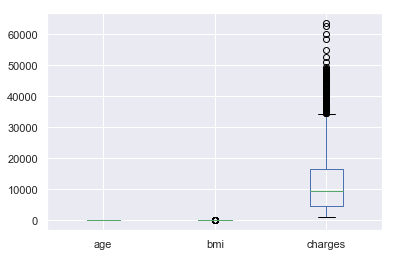

In [39]:
boxplot = data.boxplot(column=['age', 'bmi', 'charges'])

    --From the boxplot above, we can see that 'charges' attribute has a large number of outliers above the region of 35,0000

# Feature Selection and Model Building

In [17]:
#since 'region' attribute is ordinal in nature we need to use one-hot encode it.
ohe = OneHotEncoder(categorical_features = [5])
X = ohe.fit_transform(data).toarray()

In [21]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X.shape
y = X[:,-1]
y.shape

(1338, 8)

(1338,)

In [19]:
#normalization
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=25)

Building the optimal model using Backward Elimination

import statsmodels.formula.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 3, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4, 5, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4, 5, 6, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

Fitting Linear Models

Models to use:
    1. Linear Regression
    2. Ridge Regression Cross Validation
    3. Lasso Regression
    4. Lasso Regression Cross Validation
    
NB: Ridge and Lasso regression are often used when the independent variables are colinear. One issue with colinearity is that the variance of the parameter estimate is huge. Ridge and Lasso regression reduces this variance at the price of introducing bias to the estimates.

1. Linear Regression technique

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = rlr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.9999999386259347

    --From above, we can see that linear regression is overfitting

2. Ridge Regression Cross Validation technique

In [23]:
rlr = RidgeCV(cv = 10)
rlr.fit(X_train, y_train)
y_pred = rlr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred, multioutput='raw_values')

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

array([0.99999994])

    --From above, we can see that RidgeCV regression is overfitting

3. Lasso Regression technique

In [34]:
lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=25,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print('The coefficients are :  %s' %lr.coef_)

The coefficients are :  [ 0.         -0.          0.          0.          0.          0.
  0.          0.39839244]


    --Lasso technique has reduced all the insignificant variables to 0. This is different from Ridge regression which tends to reduce insignificant variables towards 0, i.e they'll be close to 0 but not be 0

In [36]:
print('The Intercept is: %s' %lr.intercept_)

The Intercept is: -0.005996772591365655


In [25]:
#accuracy score for our lasso regression technique
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.63774039])

    --Using r2_score to check the performance of our model, we see that our lasso regression model performs poorly(63.77%), this is mainly because of our limited features, that is the number of the independent variables/attributes.
   
    --This problem can be addressed by adding more attributes that best describe each policyholder as well as having a large number of policyholders.

4. Lasso Regression Cross Validation technique

In [28]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10, random_state=0).fit(X, y)
print('Lasso_Cross_Val Score: %0.02f%%' %(reg.score(X, y)*100)) 

Lasso_Cross_Val Score: 100.00%


    --From above, we can see that the LassoCV regression is overfitting